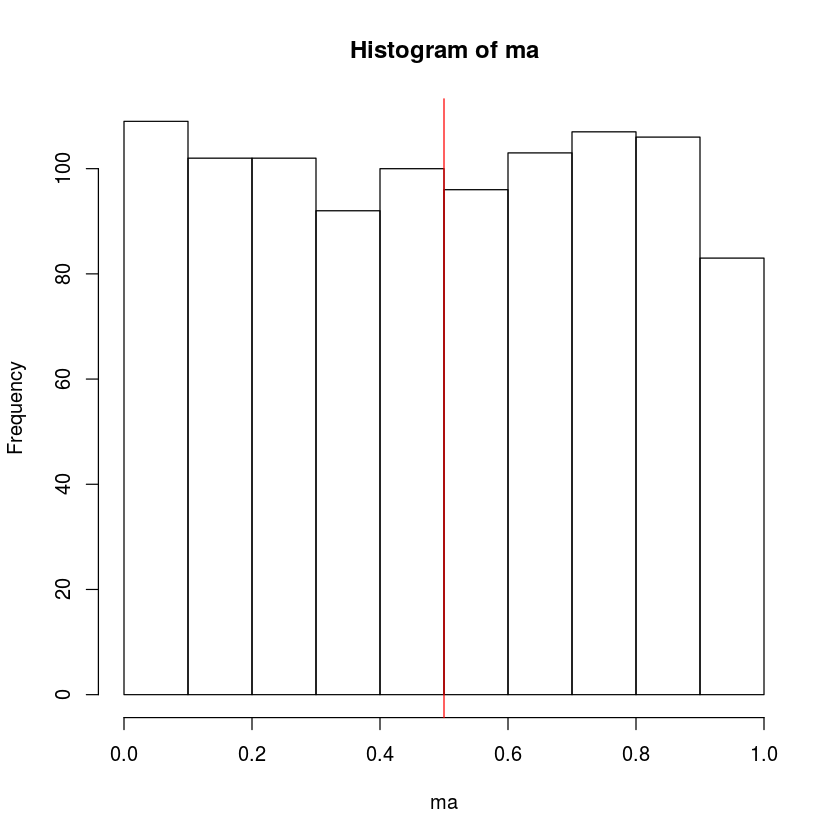

In [1]:
# Ej 1.a
Nrep = 1000
ma = runif(Nrep, 0, 1)
hist(ma)
abline(v=0.5, col='red')

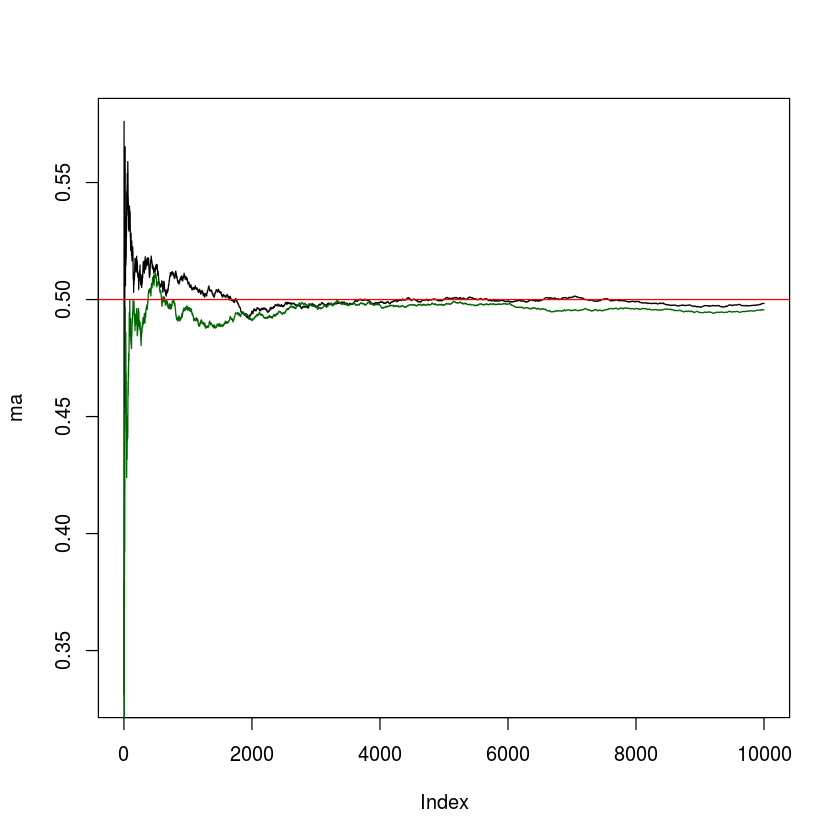

In [2]:
# Ej 1.b y c
ma = runif(10000, 0, 1)
ma = cumsum(ma) / seq(1, length(ma))
plot(ma, type='l')
ma = runif(10000, 0, 1)
ma = cumsum(ma) / seq(1, length(ma))
lines(ma, col='darkgreen')
abline(h=0.5, col='red')

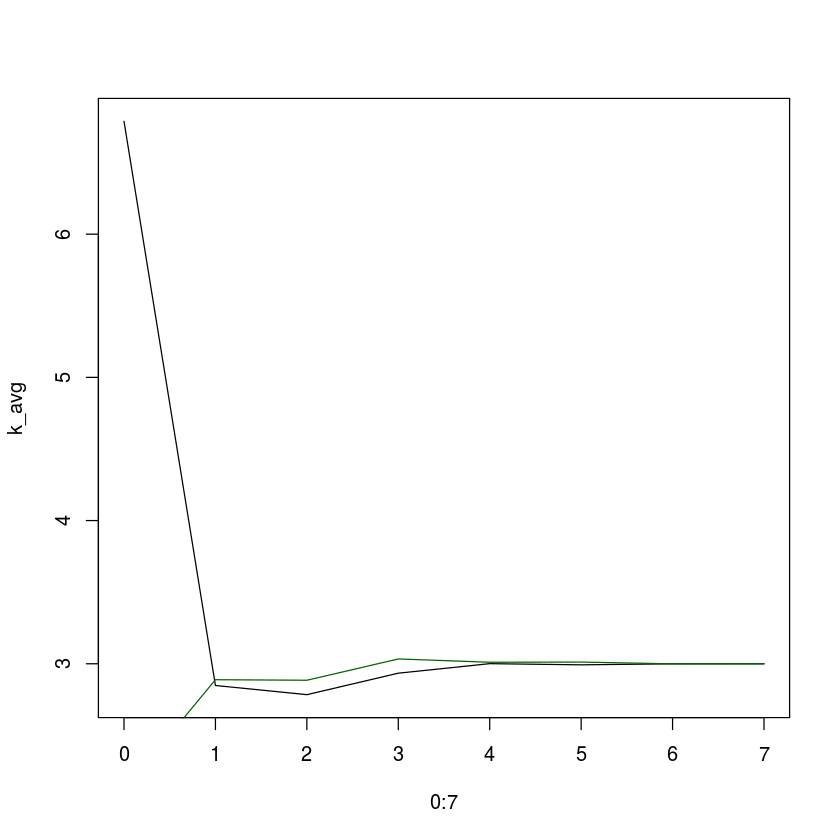

In [3]:
# Ej 1.d
k_avg = sapply(10 ** (0:7), function(xn) {return(mean(rnorm(xn, 3, 2)))})
plot(0:7, k_avg, type='l')
k_avg = sapply(10 ** (0:7), function(xn) {return(mean(rnorm(xn, 3, 2)))})
lines(0:7, k_avg, type='l', col='darkgreen')

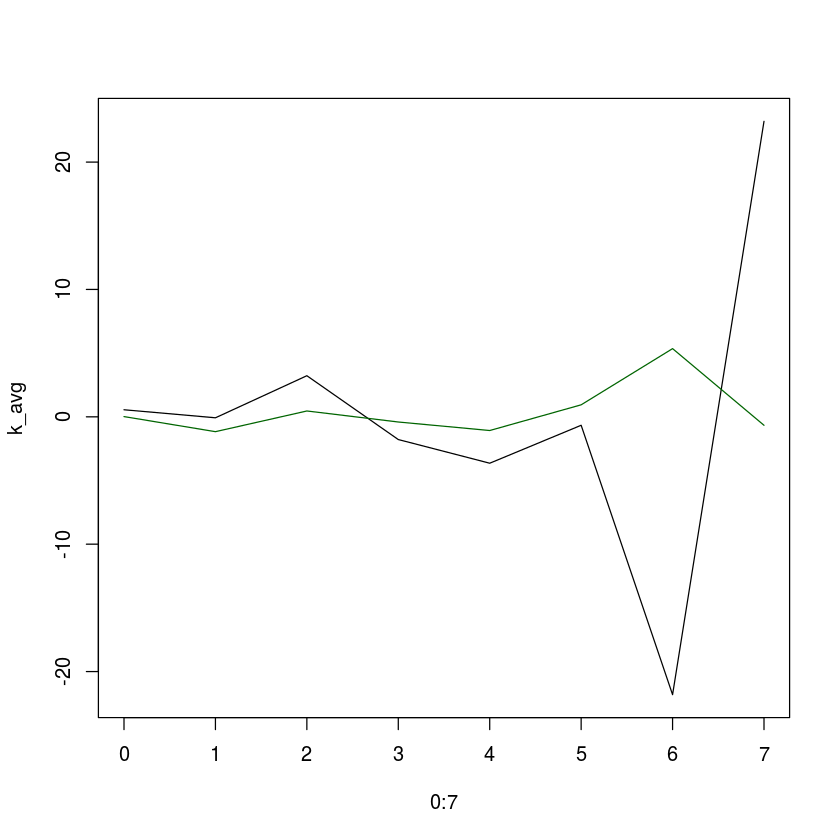

In [4]:
# Ej 1.f
k_avg = sapply(10 ** (0:7), function(xn) {return(mean(rcauchy(xn, 0, 1)))})
plot(0:7, k_avg, type='l')
k_avg = sapply(10 ** (0:7), function(xn) {return(mean(rcauchy(xn, 0, 1)))})
lines(0:7, k_avg, col='darkgreen')

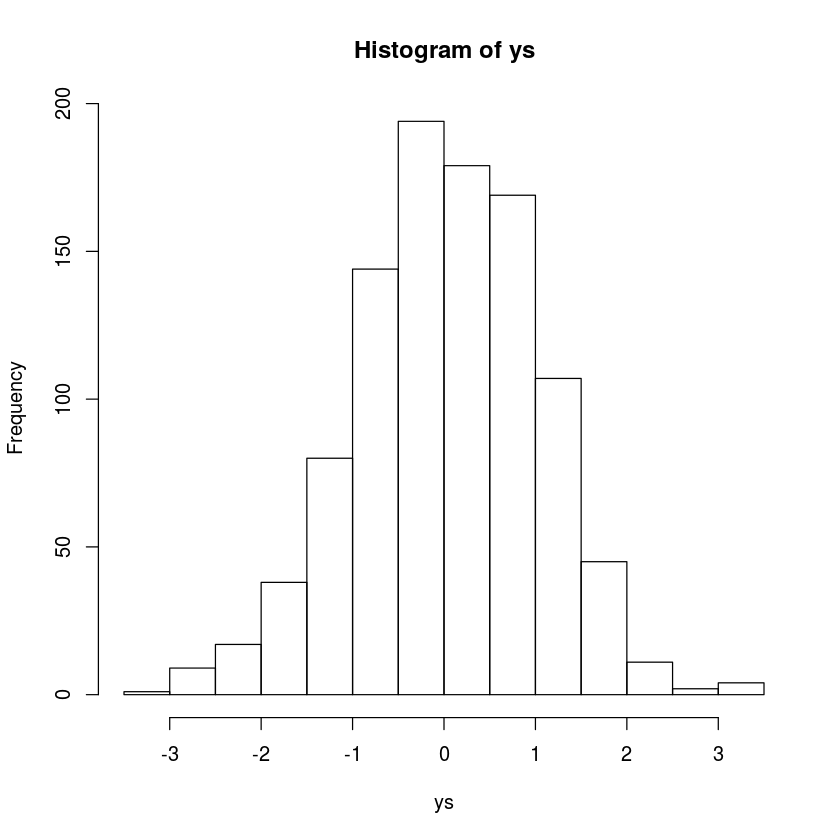

In [5]:
# Ej 2.a
Nrep = 1000
ys = rnorm(Nrep, 0, 1)
hist(ys)

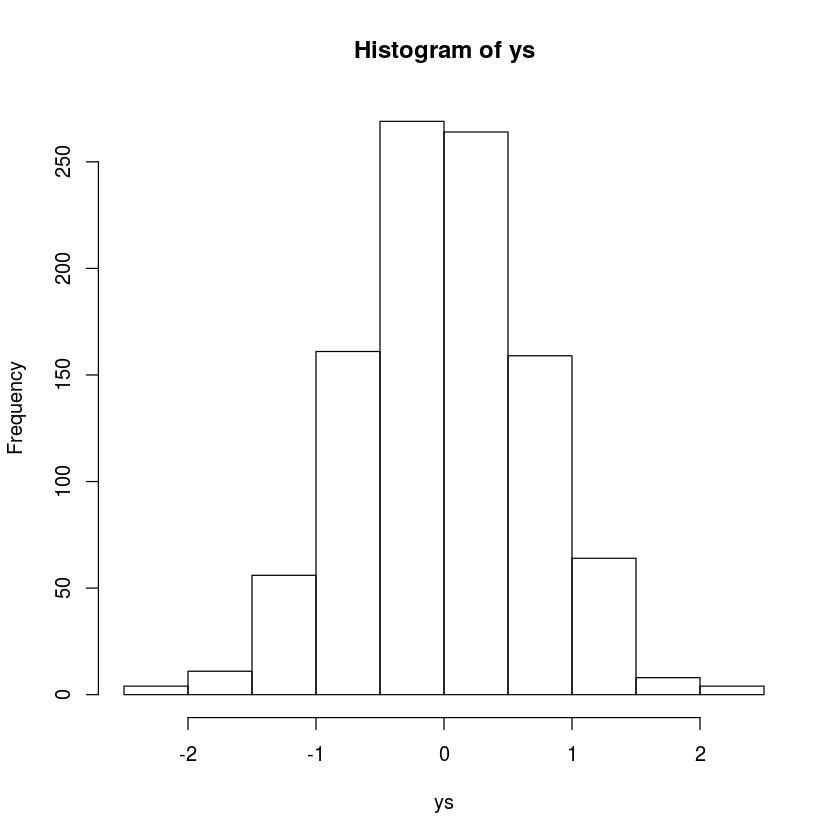

In [6]:
# Ej 2.b
ys = sapply(1:1000, function(x) { return(mean(rnorm(2, 0, 1))) } )
hist(ys)

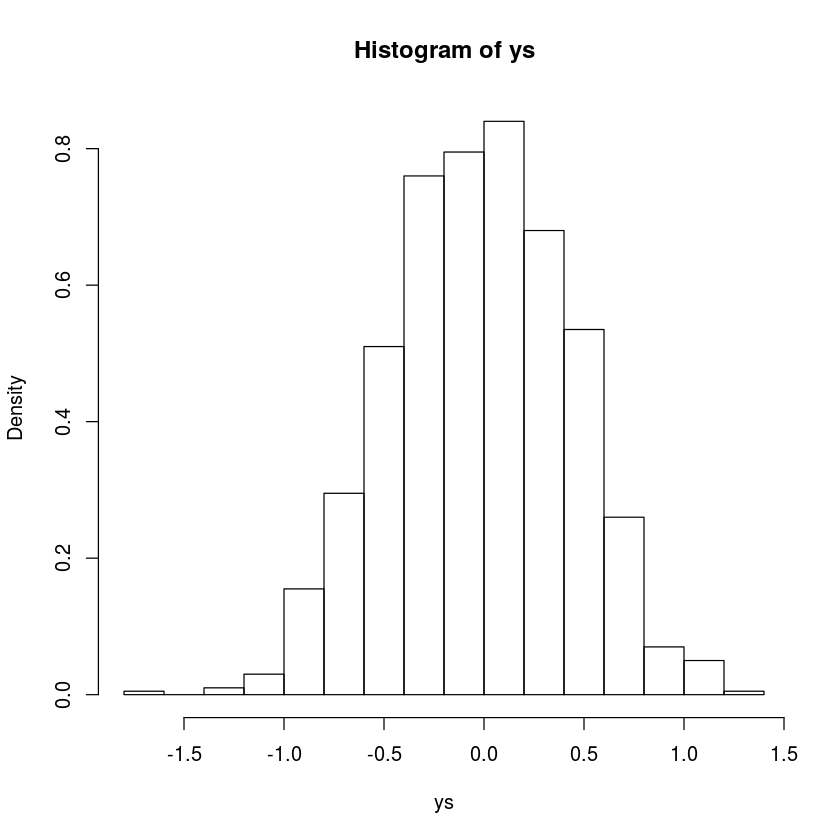

In [7]:
# Ej 2.c
ys = sapply(1:1000, function(x) { return(mean(rnorm(5, 0, 1))) } )
hist(ys, freq=F)

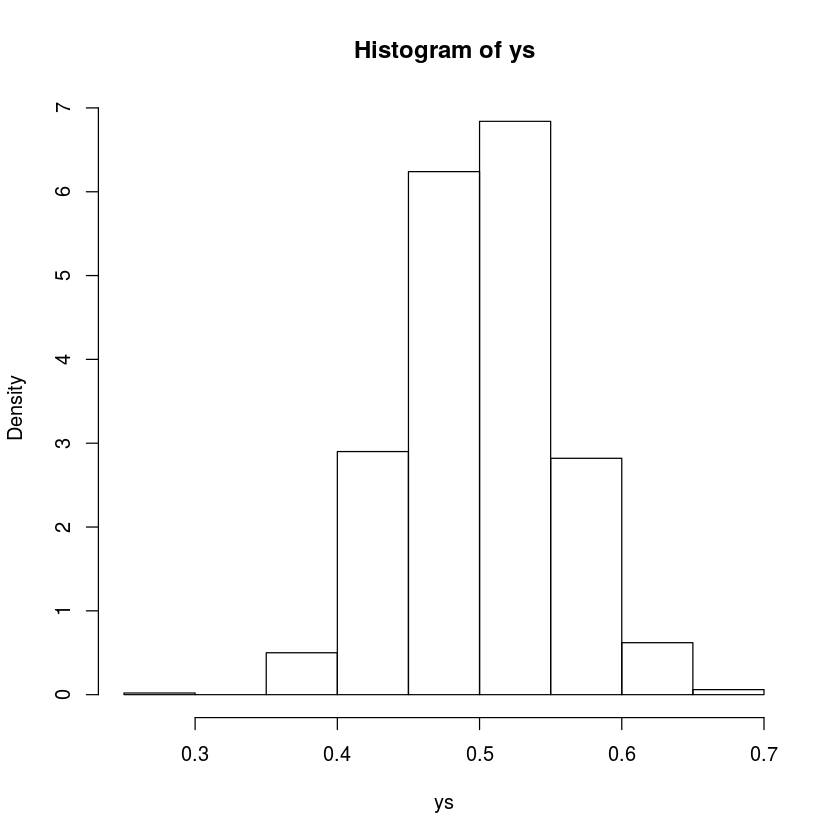

In [8]:
# Ej 2.d
ys = sapply(1:1000, function(x) { return(mean(runif(30, 0, 1))) } )
hist(ys, freq=F)

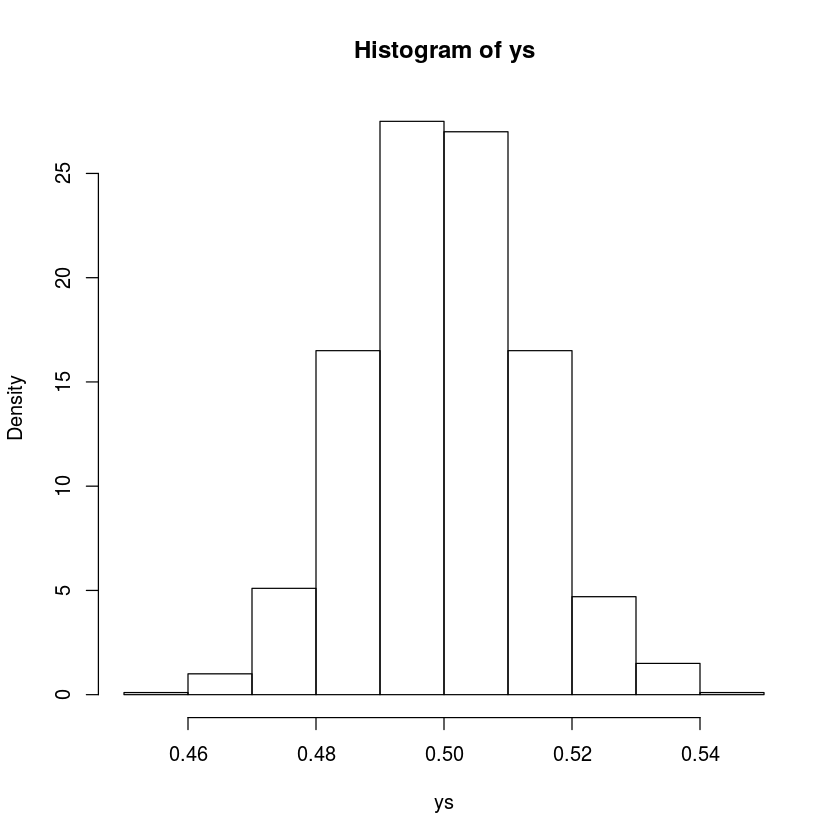

In [9]:
# Ej 2.e
ys = sapply(1:1000, function(x) { return(mean(runif(500, 0, 1))) } )
hist(ys, freq=F)

In [10]:
# Ej 2 revised
runs = matrix(runif(1000 * 1200), ncol=1200, nrow=1000)
ns = c(1, 2, 5, 30, 500, 1200)
mean_dists = lapply(ns, function(n) {
    rowMeans(matrix(runs[,1:n], nrow=1000, ncol=n))
})


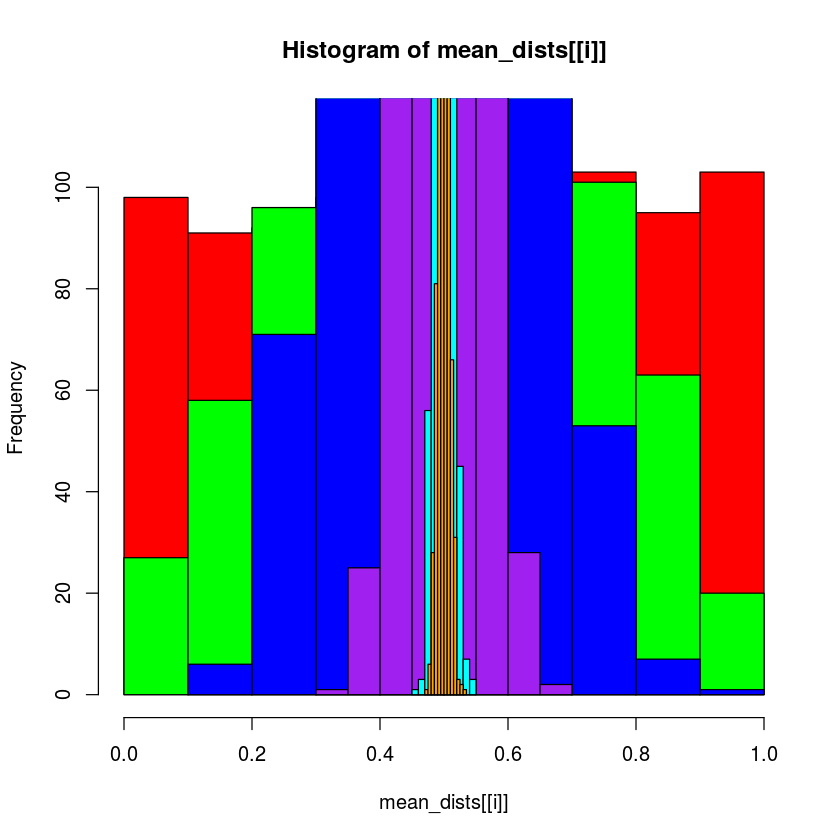

In [11]:
cols = c('red', 'green', 'blue', 'purple', 'cyan', 'orange')
for (i in 1:length(ns)) {
    n = ns[i]
    hist(mean_dists[[i]], col=cols[i], add=i != 1)
}

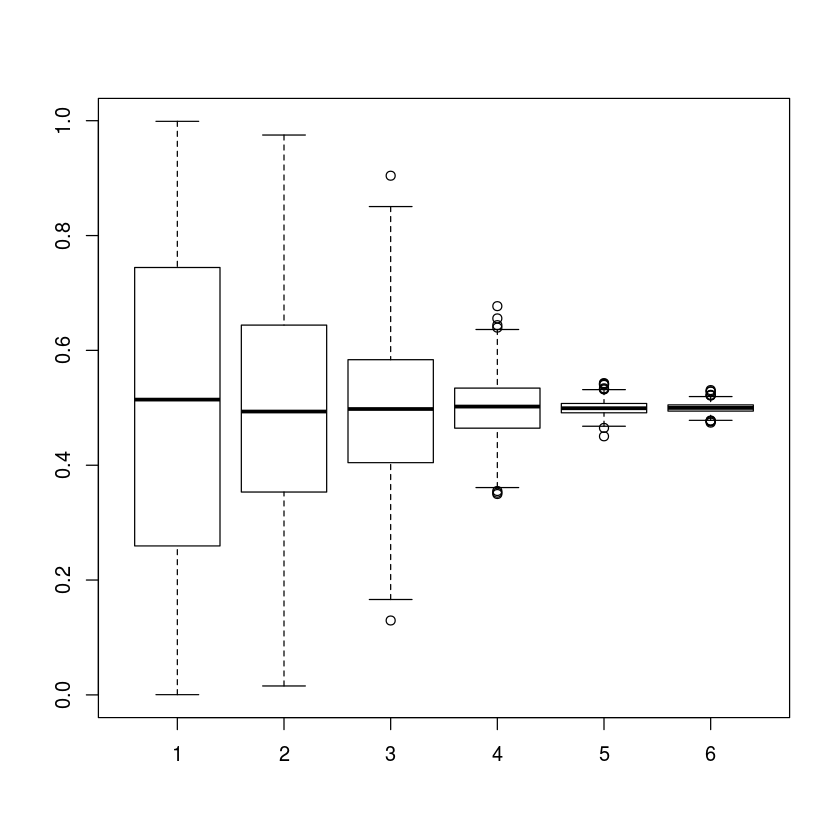

In [12]:
boxplot(mean_dists)

In [13]:
std_mean_dists = lapply(1:length(ns), function(i) {
    dist = mean_dists[[i]]
    n = ns[i]
    (dist - mean(dist)) / sqrt(1/(12 * n))
})

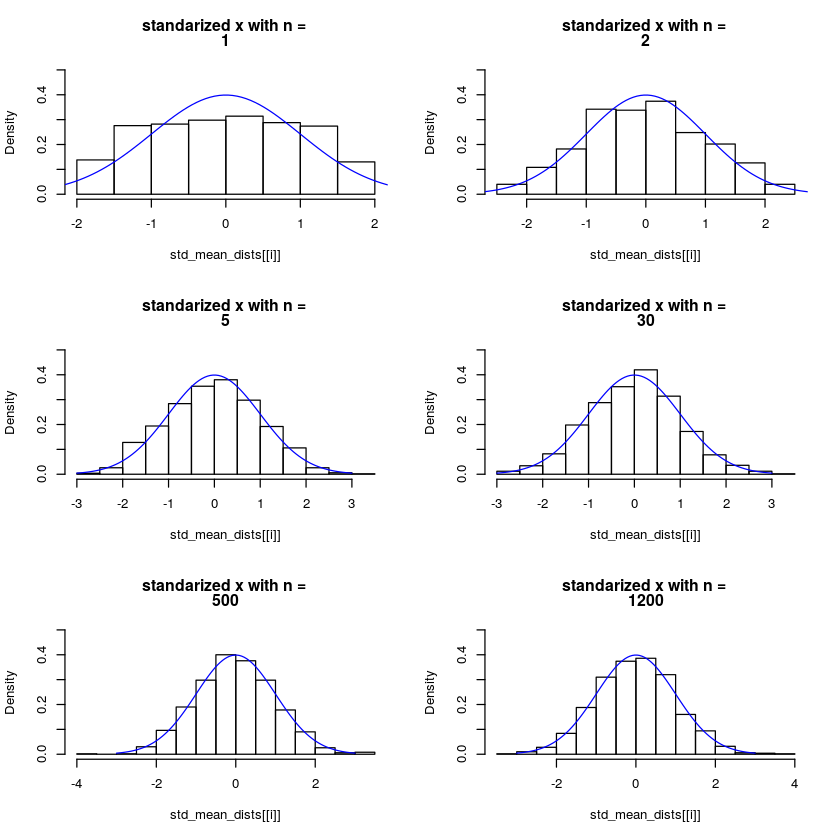

In [14]:
## Ej 2.g
rows = length(ns) / 2
par(mfrow=c(rows, 2))
for (i in 1:length(ns)) {
    hist(std_mean_dists[[i]], main=c('standarized x with n = ', ns[i]), freq=F, ylim=c(0, 0.5))
    xs = seq(-3, 3, length.out=100)
    lines(xs, dnorm(xs), col='blue')
}

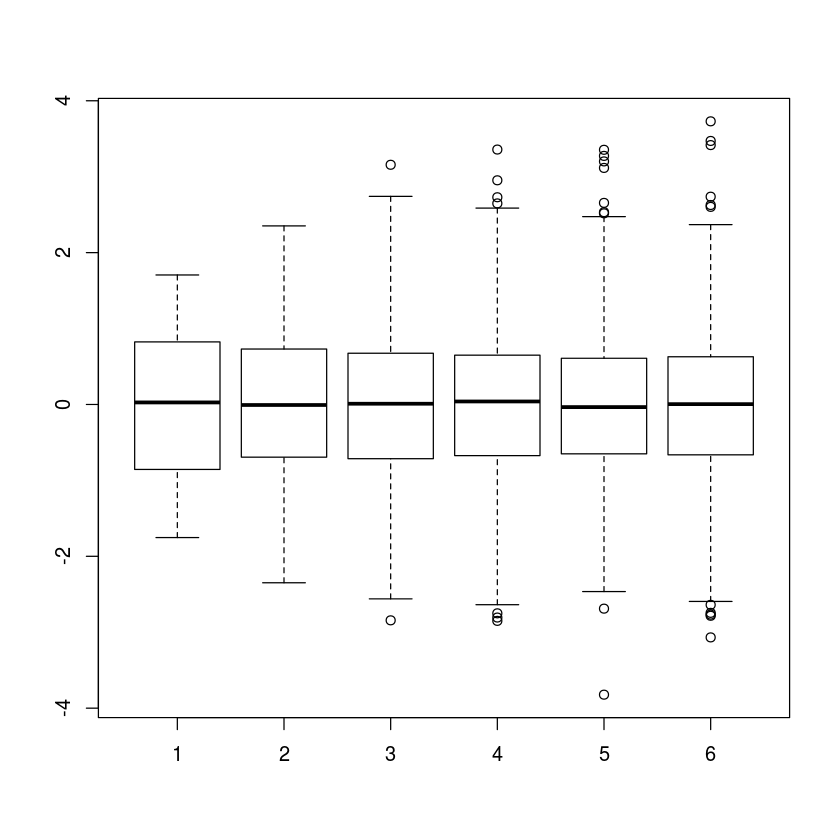

In [15]:
boxplot(std_mean_dists)

In [29]:
runs = matrix(rcauchy(1000 * 1200), nrow=1000, ncol=1200)
mean_dists = lapply(1:length(ns), function(i) {
    n = ns[i]
    rowMeans(matrix(runs[,1:n], nrow=1000, ncol=n))
})

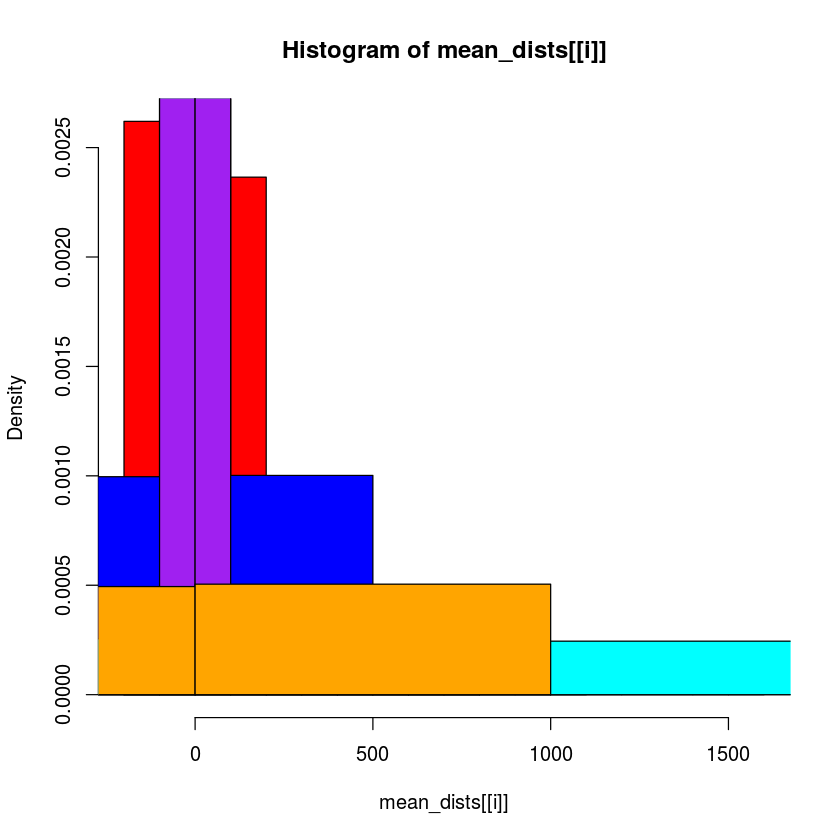

In [30]:
for (i in 1:length(ns)) {
    n = ns[i]
    hist(mean_dists[[i]], col=cols[i], add=i != 1, freq=F)
}

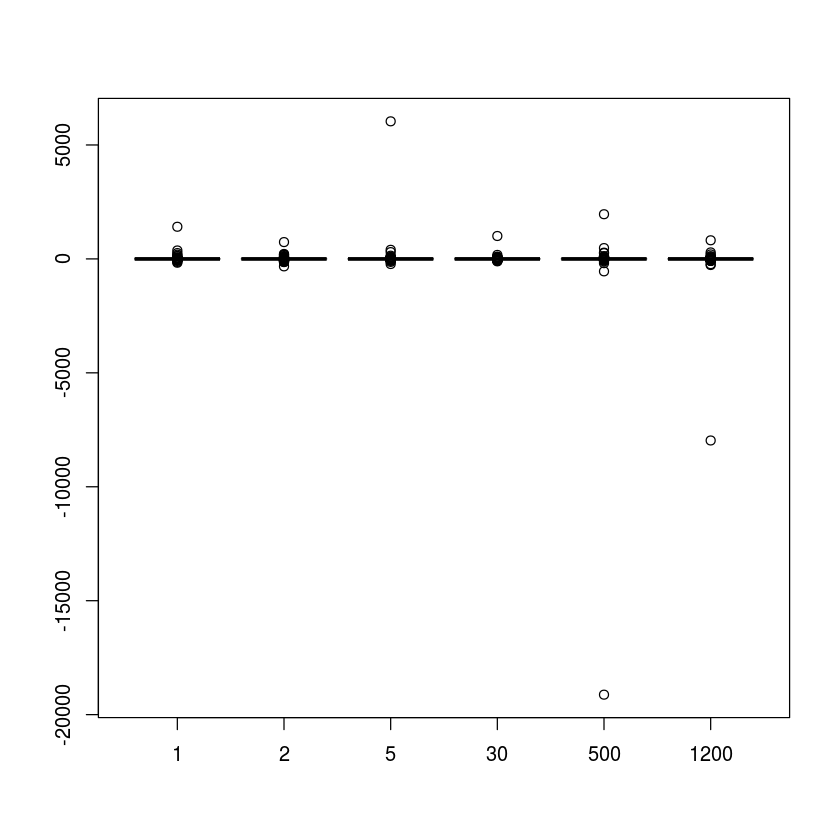

In [31]:
boxplot(mean_dists, names=ns)

In [50]:
## Ej 3
ns = c(100, 1000, 50000)
ab = list(c(-1.96, 1.96), c(-2, 1), c(0, 2.34))
aprox = matrix(ncol=length(ns), nrow=length(ab))
for (i in 1:length(ab)) {
    a = ab[[i]][1]
    b = ab[[i]][2]
    for (j in 1:length(ns)) {
        n = ns[j]
        aprox[i,j] = mean(dnorm(runif(n, a, b))) * (b - a)
    }
}
d_aprox = data.frame(aprox)
rownames(d_aprox) = ab
colnames(d_aprox) = ns
print(d_aprox)

                     100      1000     50000
c(-1.96, 1.96) 0.8877437 0.9614731 0.9478030
c(-2, 1)       0.7525937 0.8046093 0.8184353
c(0, 2.34)     0.4011758 0.5001627 0.4897862


In [51]:
r_aprox = sapply(ab, function(p) (pnorm(p[2]) - pnorm(p[1])))
print(r_aprox)

[1] 0.9500042 0.8185946 0.4903581


In [52]:
d_aprox - cbind(r_aprox, r_aprox, r_aprox)

,100,1000,50000
"c(-1.96, 1.96)",-0.06226053,0.011468874,-0.0022011697
"c(-2, 1)",-0.06600096,-0.013985323,-0.0001592846
"c(0, 2.34)",-0.08918231,0.009804603,-0.0005719242
